# Lesson 05 Assignment: 
Author: Ajai Shukla

Instructions

It is recommended you complete the lab exercises for this lesson before beginning the assignment.

Using the WI_Breast_Cancer csv file, create a new notebook to build a decision tree classifier that would be able to detect whether a tumor is benign or malignant. Complete the following tasks and answer the questions: 1.Test both entropy and the gini coefficient. Which performs better and why? 2.What are the best hyperparameter settings for both? 3.Visualize both models and see which feature is selected for each criterion. Are they same for both? Why or why not? 4.Determine the AUC for the best model you can achieve. What are the precision and recal values and which might be the one you want to maximize? 5.What are the implications of using this type of machine learning algorithm for breast cancer analysis?


In [1]:
import pandas as pd
import numpy as np
import math
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from vpython import *
from mpl_toolkits.mplot3d import axes3d

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
from sklearn import preprocessing
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn import tree

from xgboost import XGBClassifier

%matplotlib inline

# Set Random Seed
np.random.seed(42)
np.random.RandomState(42)

<IPython.core.display.Javascript object>

In [2]:
# Read csv
data = pd.read_csv(r"C:\Users\ashukla\Documents\DS\data.csv")
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Analyzing Data

In [3]:
print("Number Of Data Points:", len(data))

Number Of Data Points: 569


In [4]:
# Describe data
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
# print columns
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

# Preparing Data

In [7]:
# Save labels in y
y = data["diagnosis"]

In [8]:
# Drop columns
X = data.drop(["id", "diagnosis", "Unnamed: 32"], axis=1)

# Looking for correlation between features

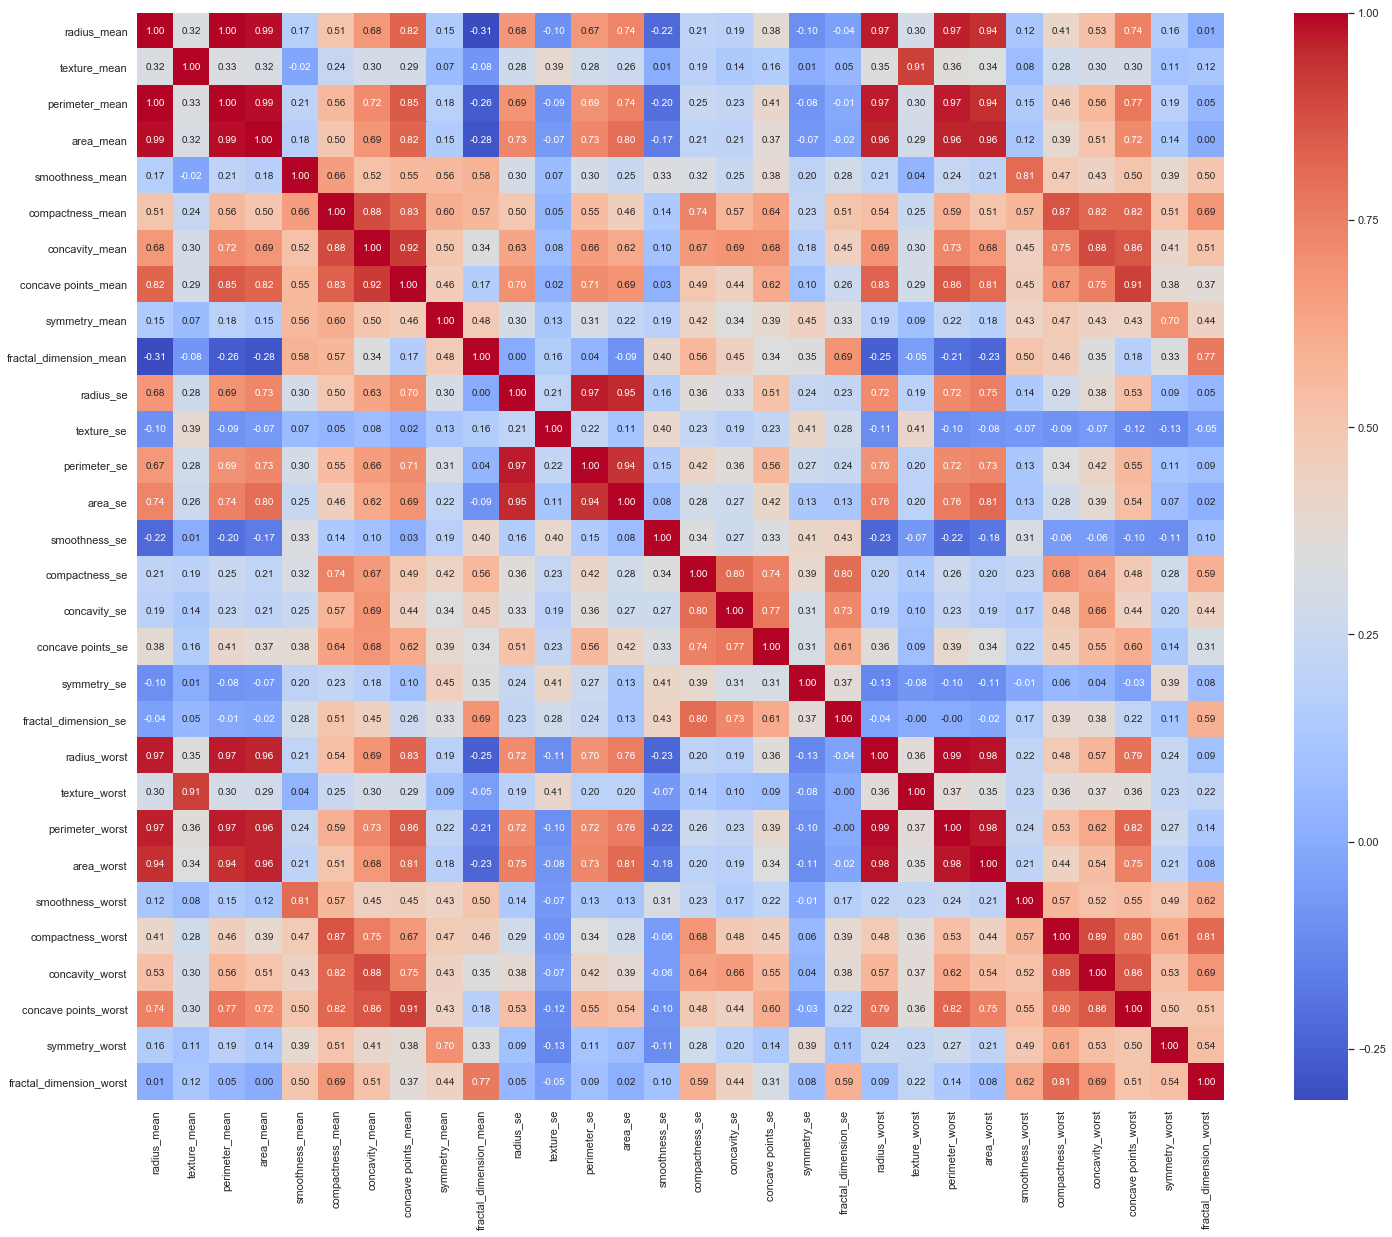

In [9]:
# Plot a Correlation chart
corr = X.corr() # .corr is used for find corelation
#plt.figure(figsize=(20,15))
sns.set(rc={'figure.figsize':(25,20)})
# plot a heatmap
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
           xticklabels= X.columns, yticklabels= X.columns,
           cmap= 'coolwarm')

# There is some stronge correlations:

Features like (something)_mean, (something)_se, (something)_worst, have a natural correlation because all these are generated using same data, for example: to generate radius_mean, radius_se and radius_worst, radius mesuraments is used.


# Positive Correlation:

Radius, Perimeter and Area have stronge positive correlation


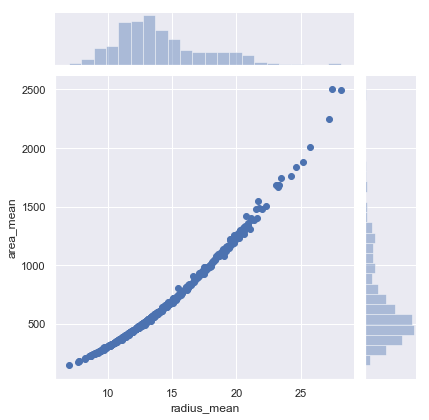

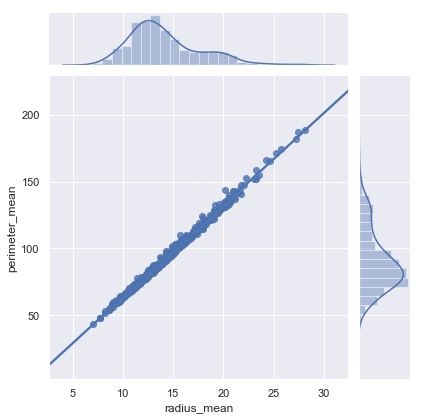

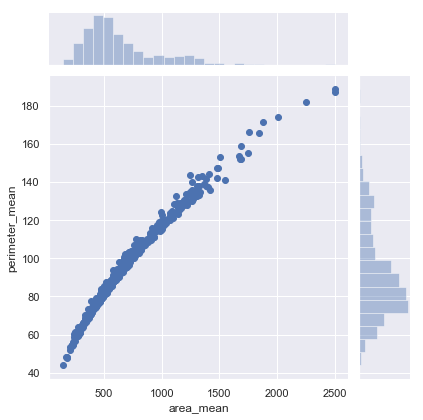

In [10]:
# Plot correlation between 2 features and distribution
sns.jointplot(X.loc[:,'radius_mean'], 
              X.loc[:,'area_mean'], 
              kind="scatter")

sns.jointplot(X.loc[:,'radius_mean'], 
              X.loc[:,'perimeter_mean'], 
              kind="regg")

sns.jointplot(X.loc[:,'area_mean'], 
              X.loc[:,'perimeter_mean'], 
              kind="scatter")

# Radius have a strong positive correlation with Concave Points

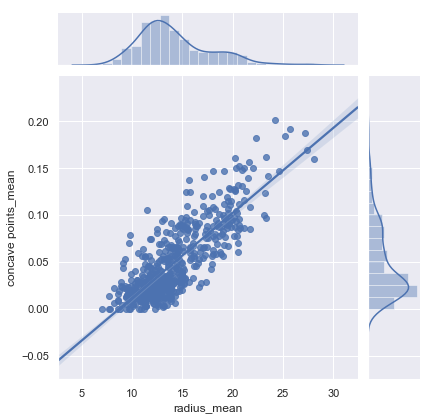

In [11]:
# Plot correlation between 2 features and distribution
sns.jointplot(X.loc[:,'radius_mean'], 
              X.loc[:,'concave points_mean'], 
              kind="regg")

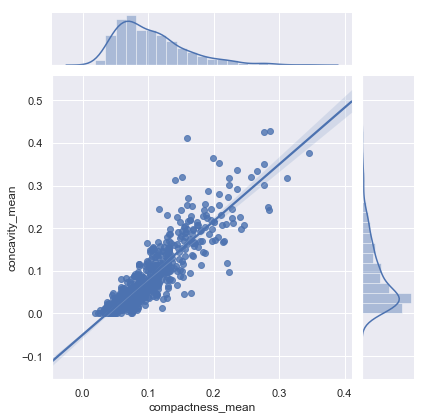

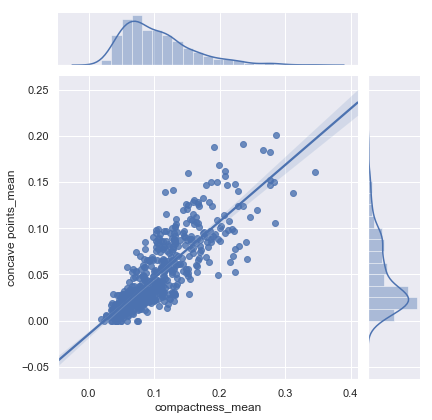

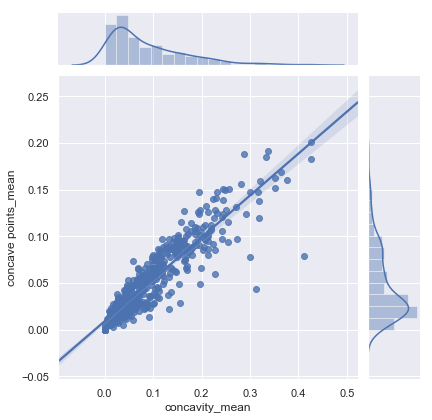

In [12]:
# Plot correlation between 2 features and distribution
sns.jointplot(X.loc[:,'compactness_mean'], 
              X.loc[:,'concavity_mean'], 
              kind="regg")

sns.jointplot(X.loc[:,'compactness_mean'], 
              X.loc[:,'concave points_mean'], 
              kind="regg")


sns.jointplot(X.loc[:,'concavity_mean'], 
              X.loc[:,'concave points_mean'], 
              kind="regg")

# Negative Correlation
Fractal Dimention have some negative correlation with Radius, Perimeter and Area


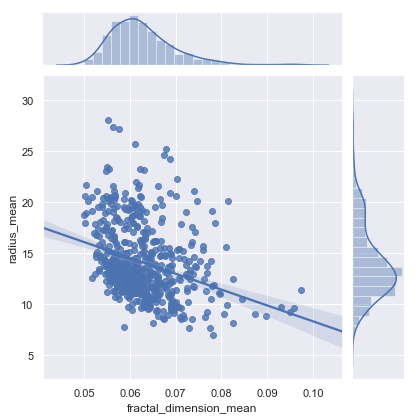

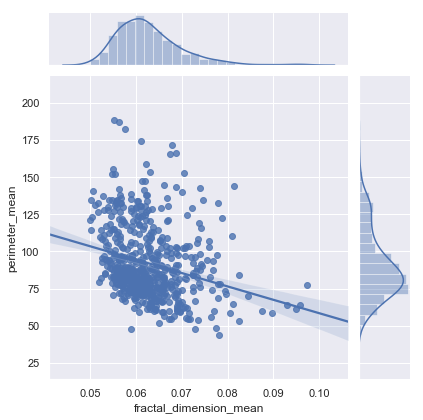

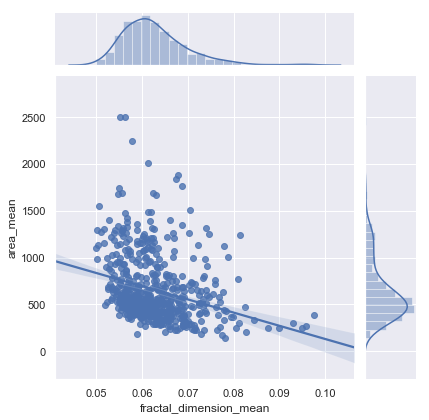

In [13]:
# Plot correlation between 2 features and distribution
sns.jointplot(X.loc[:,'fractal_dimension_mean'], 
              X.loc[:,'radius_mean'], 
              kind="regg")

sns.jointplot(X.loc[:,'fractal_dimension_mean'], 
              X.loc[:,'perimeter_mean'], 
              kind="regg")

sns.jointplot(X.loc[:,'fractal_dimension_mean'], 
              X.loc[:,'area_mean'], 
              kind="regg")

# Verifing  Dataset is Balanced

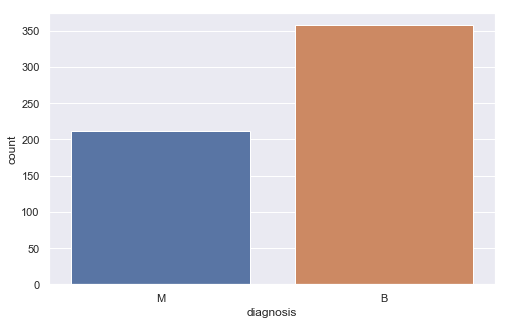

In [14]:
# Plot a countplot
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(y)

In [15]:
# Print count
count = y.value_counts()
print ('Number of Benign:', count[0])
print ('Number of Malignant:', count[1])

Number of Benign: 357
Number of Malignant: 212


# Feature Engineering
Creating a Volume Mean Feature using radius_mean

In [16]:
# Creating a empty list
mean_volume = []
# defining pi
pi = 3.1415

# calculatin mean volume for each mean radius and saving result in mean_volume list
for i in range(len(X)):
    #aving result in mean_volume list
    mean_volume.append((math.pow(X["radius_mean"][i], 3)*4*pi)/3)
# Creating a new feature
X["mean_volume"]= mean_volume

In [17]:
# Creating a new feature adding up some phisical measuraments
X["mesuraments_sum_mean"] = X["radius_mean"] + X["perimeter_mean"] + X["area_mean"]

In [18]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,mean_volume,mesuraments_sum_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,24387.612775,1141.79
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,36456.810913,1479.47
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,31975.176401,1352.69
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,6238.412850,475.10
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,34988.227503,1452.39


# Feature Scaling

Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, the majority of classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.


In [ ]:
# Define a scaler function
def scaler(df):
    """The Function receive a Dataframe and return a Scaled Dataframe"""
    scaler = preprocessing.MinMaxScaler()
    scaled_df = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
    
    return scaled_df
# testing scaler
scaled_df = scaler(X)
scaled_df.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,mean_volume,mesuraments_sum_mean
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,0.250649,0.375800
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0.382391,0.509729
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0.333471,0.459446
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,0.052540,0.111381
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0.366360,0.498988


# Features Distribution

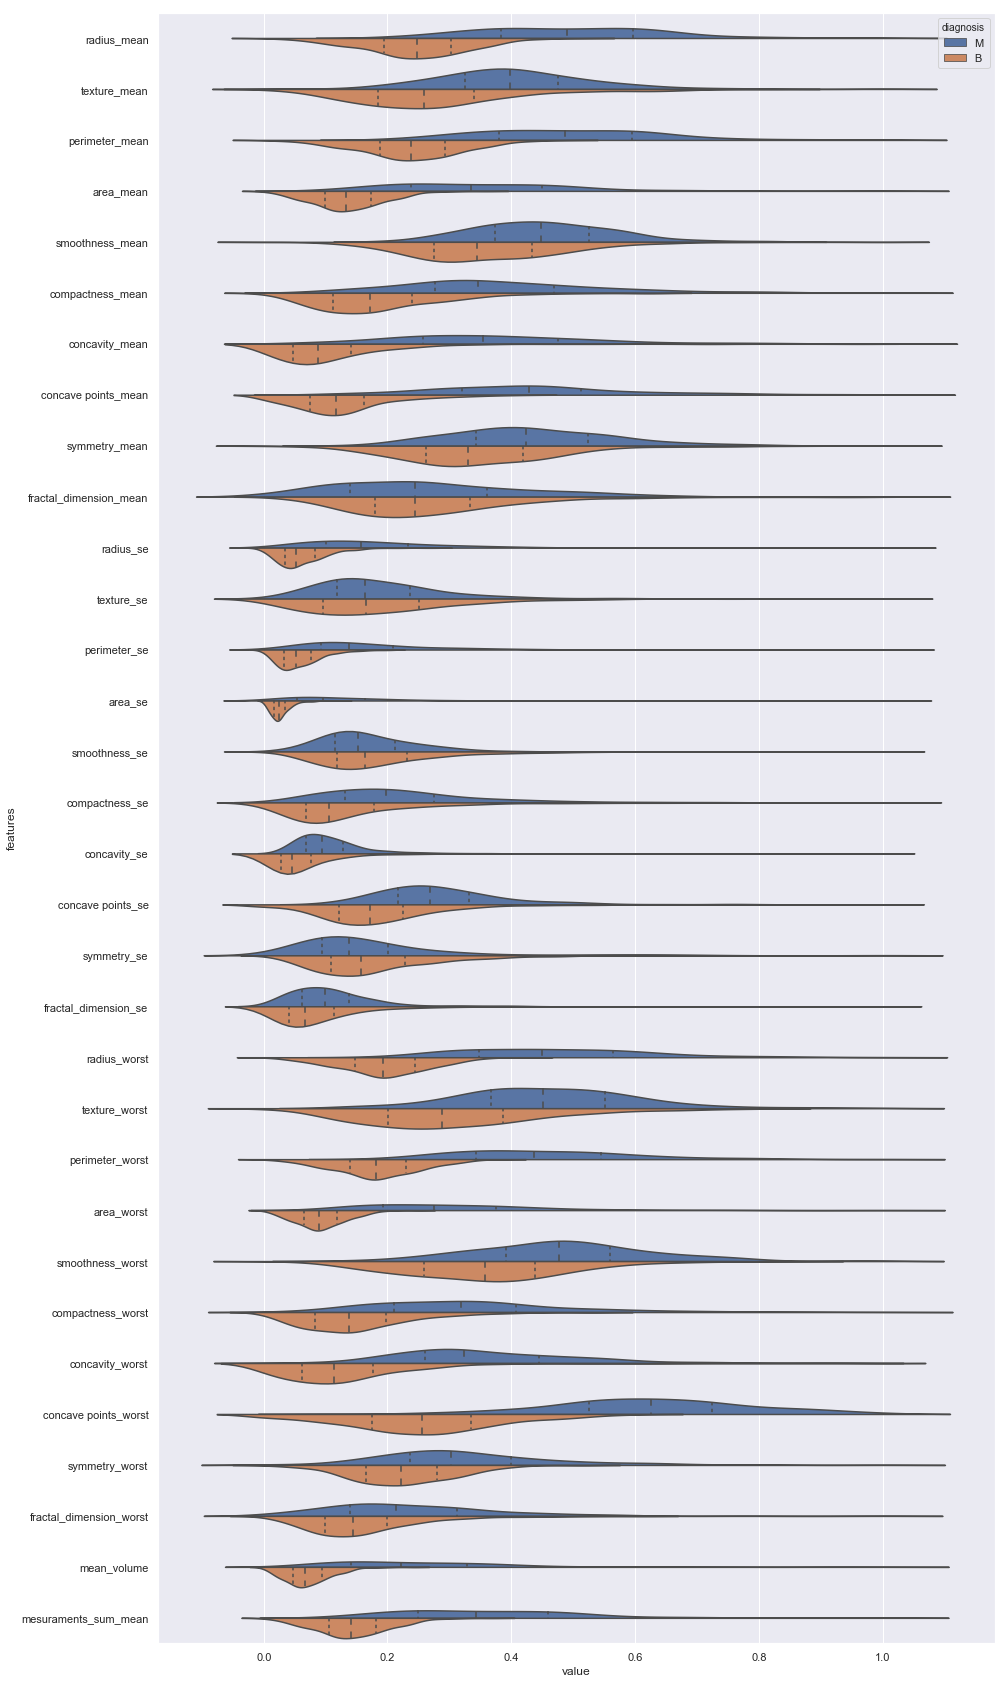

In [ ]:
# Preparing data
data_plot = pd.concat([y,scaled_df],axis=1)
data_plot = pd.melt(data_plot,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
# Plot a violinplot
sns.set(rc={'figure.figsize':(15,30)})
sns.violinplot(x="value", y="features", hue="diagnosis", data=data_plot,split=True, inner="quart")

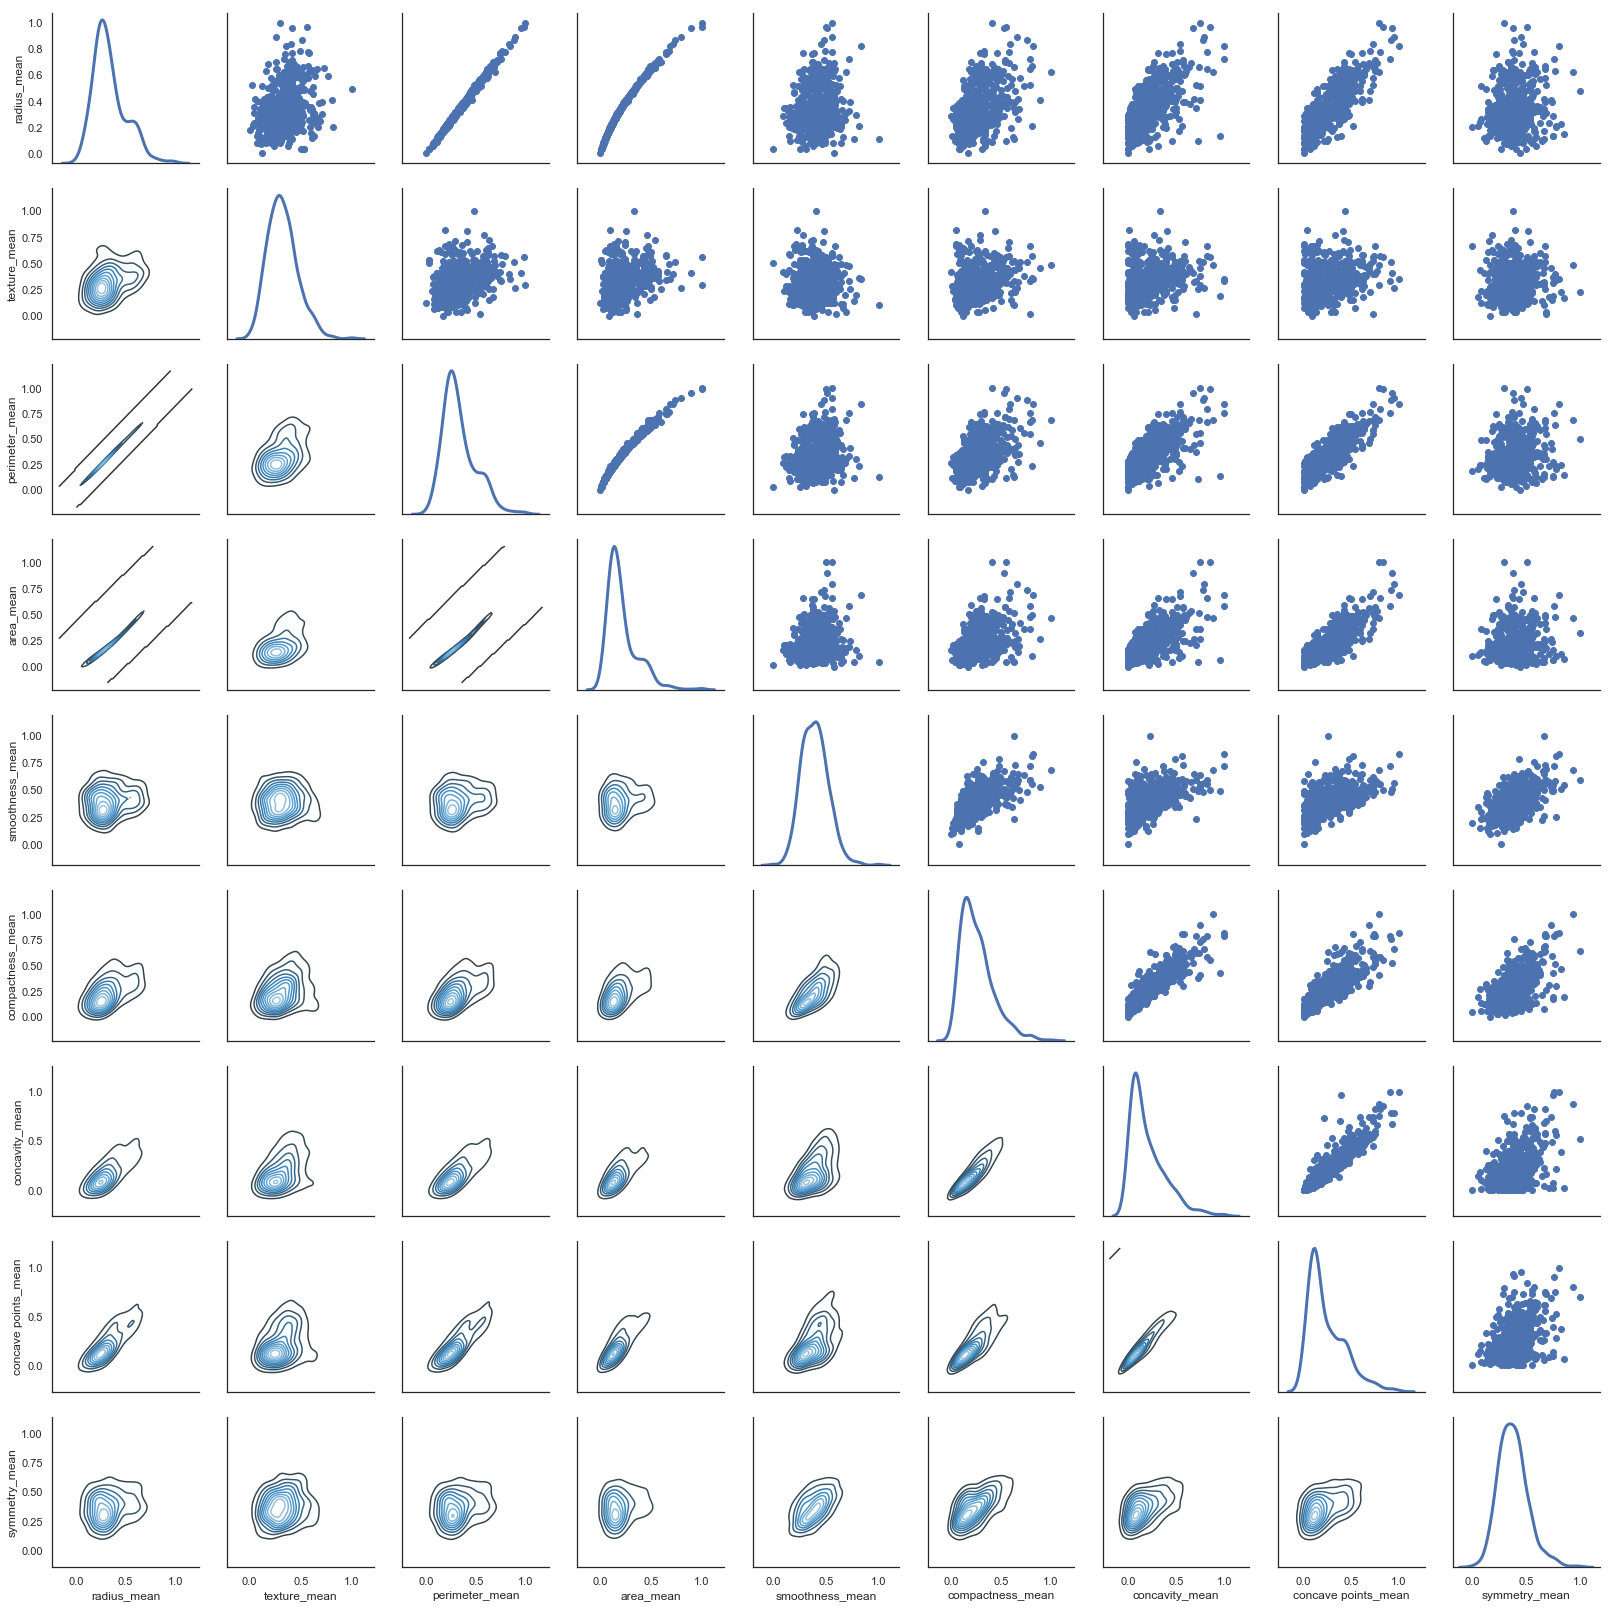

In [ ]:
# Ploting a pairplot Grid
sns.set(style="white")
df = scaled_df.iloc[:,0:9]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

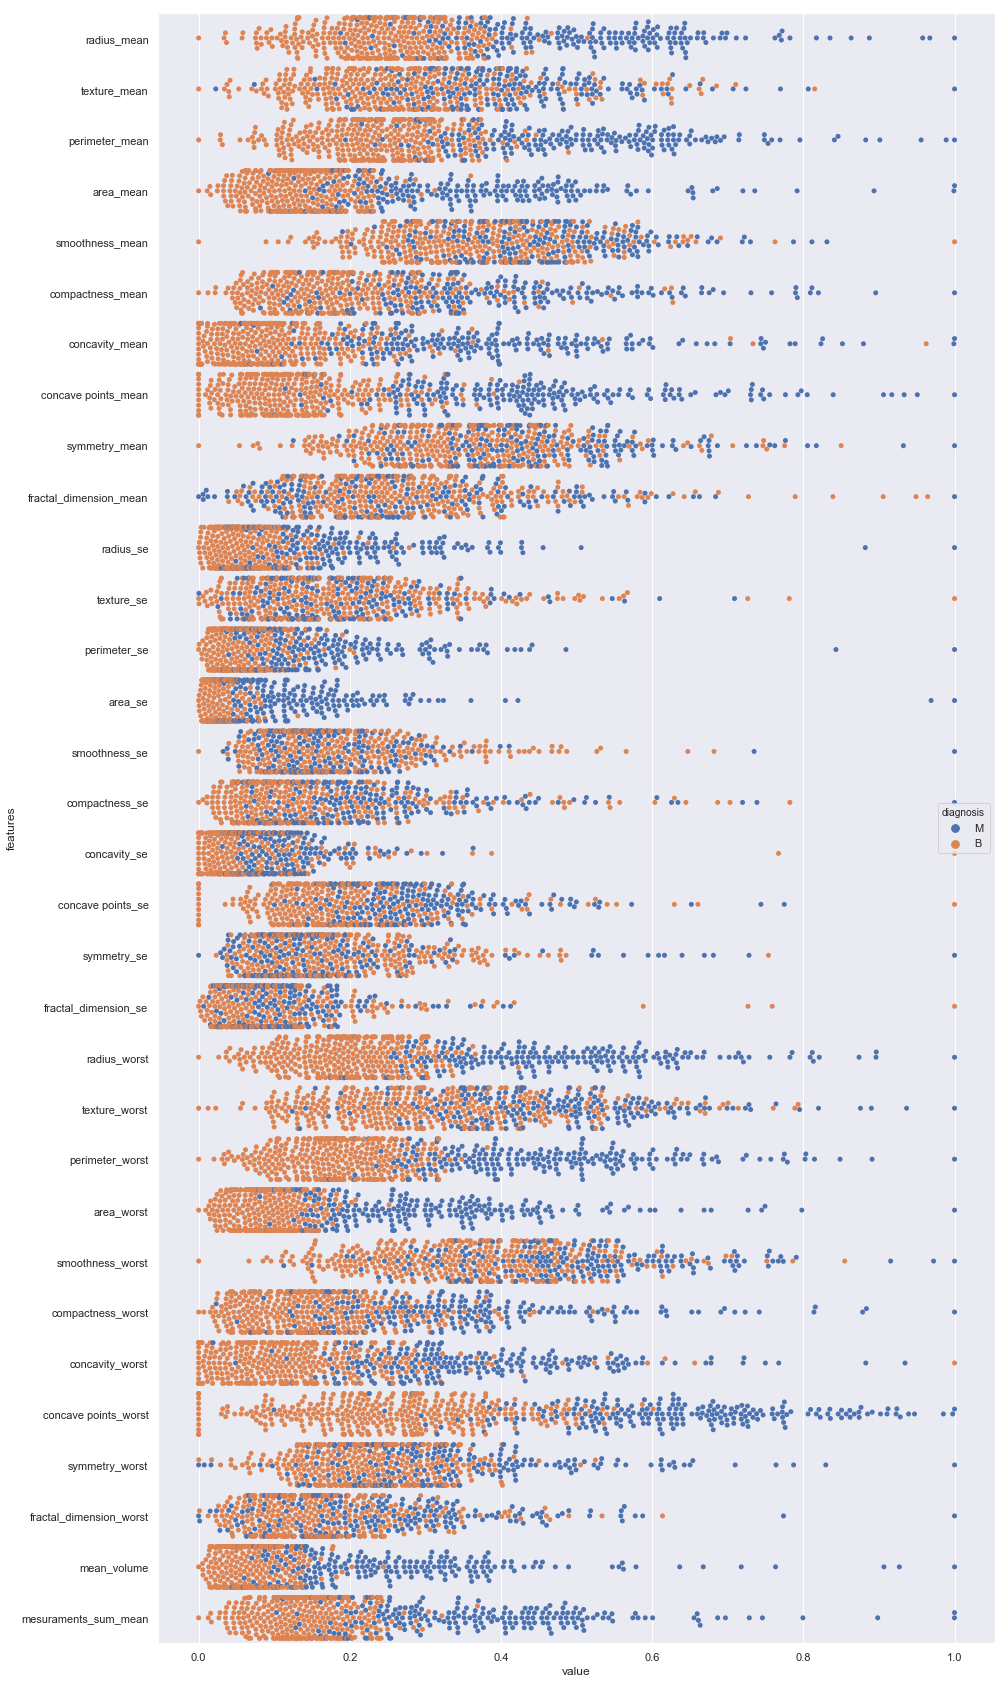

In [ ]:
# Plot a Swarmplot
sns.set(style="whitegrid", palette="muted")
data_plot = scaled_df
data_plot = pd.concat([y,data_plot.iloc[:,0:]],axis=1)
data_plot = pd.melt(data_plot,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
#plt.figure(figsize=(10,10))
sns.set(rc={'figure.figsize':(15,30)})
sns.swarmplot(x="value", y="features", hue="diagnosis", data=data_plot)

# Detect Outliers

In [ ]:
# Define a function to detect outliers
def remove_outliers(X, y, f=2, distance=1.5):
    
    """The Function receive Features (X) and Label (y) a frequency (f) and Inter-Quartile distance (distance),  
    and return features and labels without outliers (good_X, good_y)"""
    
    outliers  = []

    # For each feature find the data points with extreme high or low values
    for feature in X.keys():

        # Calculate Q1 (25th percentile of the data) for the given feature
        Q1 = np.percentile(X[feature], 25)

        # Calculate Q3 (75th percentile of the data) for the given feature
        Q3 = np.percentile(X[feature], 75)

        # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
        step = (Q3 - Q1) * distance

        outliers.append(X[~((X[feature] >= Q1 - step) & (X[feature] <= Q3 + step))].index.values)

    # Select the indices for data points you wish to remove
    flat_list = [item for sublist in outliers for item in sublist]

    # importing Counter
    from collections import Counter
    
    freq = Counter(flat_list)
    # Create a list to store outliers to remove
    outliers_to_remove = []
    
    for key, value in freq.items():
        if value > f:
            outliers_to_remove.append(key)

    # Remove the outliers, if any were specified
    good_X = X.drop(X.index[outliers_to_remove]).reset_index(drop = True)
    good_y    = y.drop(y.index[outliers_to_remove]).reset_index(drop = True)
    # Sort list
    outliers_to_remove.sort()
    # Print outliers founded
    for i in range(len(outliers_to_remove)):
        print ("data point: ", outliers_to_remove[i], "is considered outlier to more than ", f, "feature")

    print ("All ", len(outliers_to_remove), "were removed!")
    # return data without outliers
    return good_X, good_y 


good_X, good_y = remove_outliers(scaled_df, y, f=2, distance=1.5)

data point:  0 is considered outlier to more than  2 feature
data point:  3 is considered outlier to more than  2 feature
data point:  9 is considered outlier to more than  2 feature
data point:  12 is considered outlier to more than  2 feature
data point:  14 is considered outlier to more than  2 feature
data point:  15 is considered outlier to more than  2 feature
data point:  18 is considered outlier to more than  2 feature
data point:  22 is considered outlier to more than  2 feature
data point:  23 is considered outlier to more than  2 feature
data point:  25 is considered outlier to more than  2 feature
data point:  26 is considered outlier to more than  2 feature
data point:  38 is considered outlier to more than  2 feature
data point:  42 is considered outlier to more than  2 feature
data point:  68 is considered outlier to more than  2 feature
data point:  71 is considered outlier to more than  2 feature
data point:  77 is considered outlier to more than  2 feature
data point:

In [ ]:
good_X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,mean_volume,mesuraments_sum_mean
0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0.382391,0.509729
1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0.333471,0.459446
2,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0.366360,0.498988
3,0.258839,0.202570,0.267984,0.141506,0.678613,0.461996,0.369728,0.402038,0.518687,0.551179,...,0.263908,0.136748,0.712739,0.482784,0.427716,0.598282,0.477035,0.454939,0.072677,0.149860
4,0.533343,0.347311,0.523875,0.380276,0.379164,0.274891,0.264058,0.367793,0.370707,0.157119,...,0.511928,0.349194,0.482269,0.223448,0.302236,0.663918,0.295289,0.187853,0.262358,0.390102


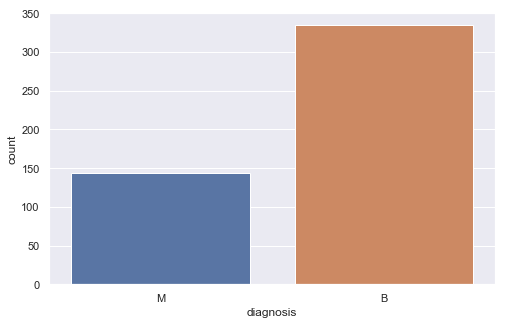

In [ ]:
sns.set(rc={'figure.figsize':(8,5)})

sns.countplot(good_y)

In [ ]:
count = y.value_counts()
count2 = good_y.value_counts()

print ('Number of Benign removed: ',count[0] - count2[0]) 
print ('Number of Malignant removed: ',count[1] - count2[1])

Number of Benign removed:  23
Number of Malignant removed:  68


# PCA

In [ ]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_X)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_X)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(good_X)


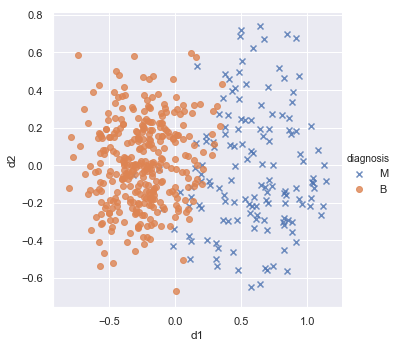

In [ ]:
pca_df = pd.DataFrame(pca_samples, columns=["d1", "d2"])

data_plot = pd.concat([good_y,pca_df.iloc[:,0:]],axis=1)

sns.lmplot(x="d1", y="d2", hue="diagnosis", data=data_plot,  markers=["x", "o"], fit_reg=False)

In [ ]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=3)
pca.fit(good_X)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(good_X)

In [ ]:
pca_df = pd.DataFrame(pca_samples, columns=["d1", "d2", "d3"])

data_plot = pd.concat([good_y,pca_df.iloc[:,0:]],axis=1)
data_plot.head()

,diagnosis,d1,d2,d3
0,M,0.692615,-0.558295,-0.226831
1,M,1.139650,-0.085448,-0.150366
2,M,0.812926,-0.301080,-0.399830
3,M,0.499923,0.719246,-0.187294
4,M,0.674242,-0.292226,-0.095475


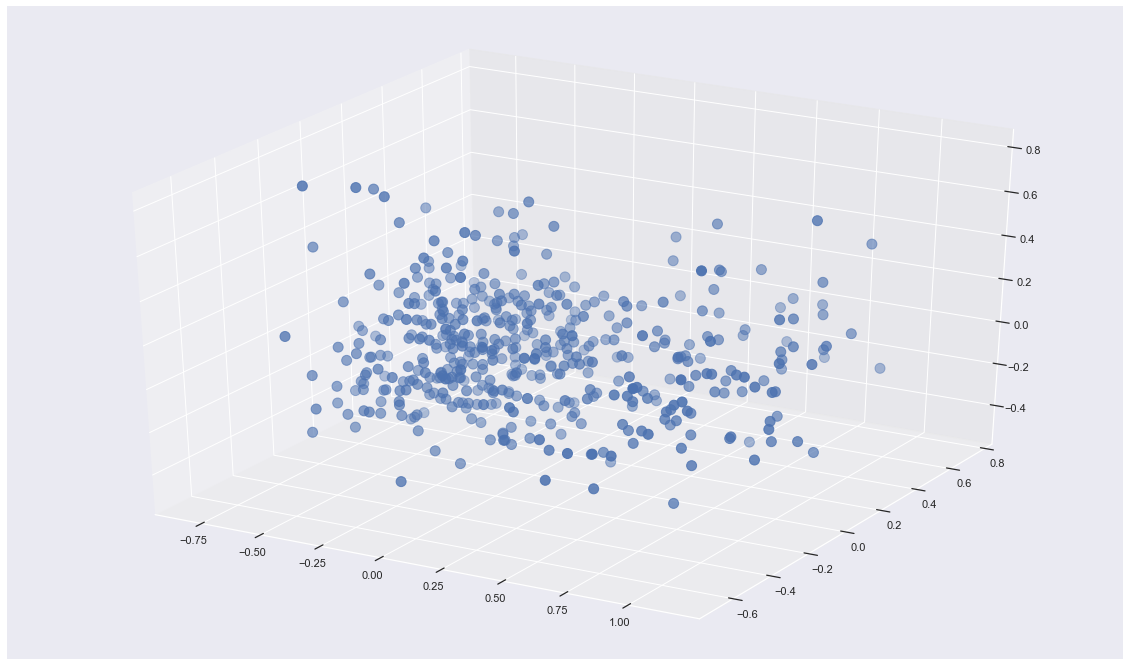

In [ ]:
# plot
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_plot['d1'], data_plot['d2'], data_plot['d3'], s=100)
#ax.view_init(30, 185)
plt.show()

In [ ]:
def pca(X, n_components=3):
    
    """The function receive features (X), and a target number of components (n_components),
    and return a PCA transformed with n_components dimentions"""

    pca = PCA(n_components)
    pca.fit(X)

    # TODO: Transform log_samples using the PCA fit above
    pca_samples = pca.transform(X)

    return pd.DataFrame(pca_samples)
    

pca_df = pca(X, 3)
pca_df.head()

,0,1,2
0,10258.198985,-689.651652,106.500059
1,22321.573082,-102.143913,-25.255216
2,17830.036487,-58.701094,-45.523263
3,-7959.822056,-21.079974,66.438676
4,20837.353069,195.675444,-126.343424


Runing PCA experiments I realized that is necessary many dimensions (or PCA components) to explain data variance, so I decided do not use PCA.
Imbalanced Learning

Naive random over-sampling
One way to fight this issue is to generate new samples in the classes which are under-represented. The most naive strategy is to generate new samples by randomly sampling with replacement the current available samples. The RandomOverSampler offers such scheme:


[('B', 357), ('M', 357)]


Using TensorFlow backend.


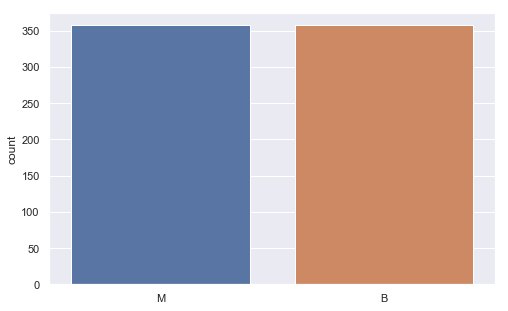

In [ ]:
from imblearn.over_sampling import RandomOverSampler
X_resampled, y_resampled = RandomOverSampler().fit_sample(X, y)
from collections import Counter
print(sorted(Counter(y_resampled).items()))

sns.set(rc={'figure.figsize':(8,5)})

sns.countplot(y_resampled)

# From random over-sampling to SMOTE 
Apart from the random sampling with replacement, there is two popular methods to over-sample minority classes: (i) Synthetic Minority Oversampling Technique (SMOTE) and (ii) Adaptive Synthetic (ADASYN) sampling method. These algorithm can be used in the same manner:


[('B', 357), ('M', 357)]


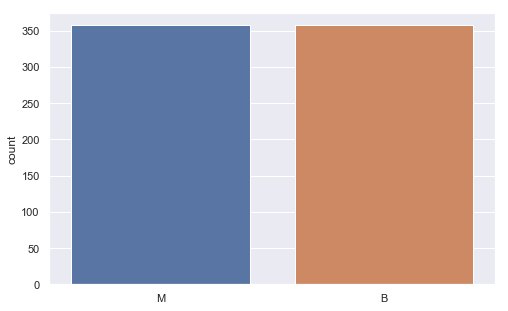

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN
X_resampled, y_resampled = SMOTE().fit_sample(X, y)
print(sorted(Counter(y_resampled).items()))

sns.set(rc={'figure.figsize':(8,5)})

sns.countplot(y_resampled)

[('B', 357), ('M', 359)]


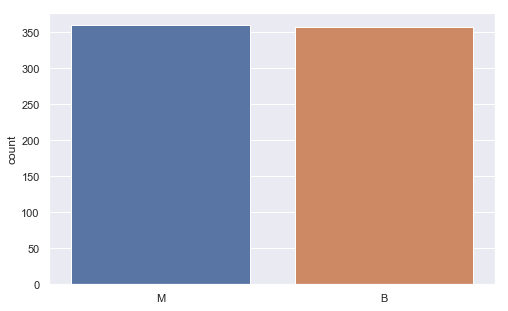

In [ ]:
X_resampled, y_resampled = ADASYN().fit_sample(X, y)
print(sorted(Counter(y_resampled).items()))

sns.set(rc={'figure.figsize':(8,5)})

sns.countplot(y_resampled)

[('B', 357), ('M', 357)]


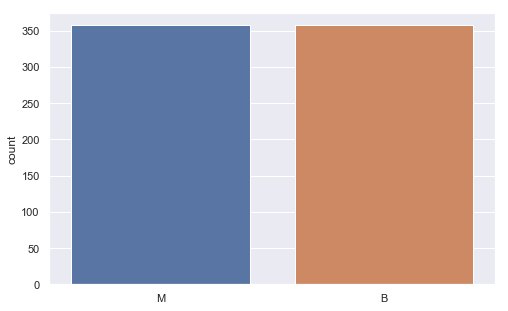

In [ ]:
# Define a function to rebalance data
def resample(X,y, method="RandomOverSampler"):
    
    """The function receive features and labels (X, y) and a method to balance data
    available methods RandomOverSampler, ADASYN, SMOTE
    
    The funcion returns X_resampled, y_resampled"""
    
    if method == "RandomOverSampler":
        X_resampled, y_resampled = RandomOverSampler().fit_sample(X, y)
    if method == "ADASYN":
        X_resampled, y_resampled = ADASYN().fit_sample(X, y)
    else:
        X_resampled, y_resampled = SMOTE().fit_sample(X, y)
        
    print(sorted(Counter(y_resampled).items()))
    
    X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
        
    return X_resampled, y_resampled


# choose between RandomOverSampler, ADASYN, SMOTE
X_resampled, y_resampled = resample(X,y, "SMOTE")

sns.set(rc={'figure.figsize':(8,5)})

sns.countplot(y_resampled)

# Feature Selection using Scikit Learn

Feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. SelectKBest removes all but the k highest scoring features


In [ ]:
def selector(X, y, k=12):
    
    """The function receive features and labels (X, y) and a target number to select features (k)
    and return a new dataset wiht k best features"""
    
    selector = SelectKBest(chi2, k)
    
    X_new = selector.fit_transform(X, y)
    
    return pd.DataFrame(X_new, columns=X.columns[selector.get_support()])

X_new = selector(X, y, 5)

X_new.head()

,area_mean,area_se,area_worst,mean_volume,mesuraments_sum_mean
0,1001.0,153.40,2019.0,24387.612775,1141.79
1,1326.0,74.08,1956.0,36456.810913,1479.47
2,1203.0,94.03,1709.0,31975.176401,1352.69
3,386.1,27.23,567.7,6238.412850,475.10
4,1297.0,94.44,1575.0,34988.227503,1452.39


Test, Tune and Compare Classifiers with different parameters and data settings

In [ ]:
data = pd.read_csv(r"C:\Users\ashukla\Documents\DS\data.csv")

y = data["diagnosis"]
X = data.drop(["id", "diagnosis", "Unnamed: 32"], axis=1)

mean_volume = []
pi = 3.1415

for i in range(len(X)):
    
    mean_volume.append((math.pow(X["radius_mean"][i], 3)*4*pi)/3)

X["mean_volume"]= mean_volume  



X["mesuraments_sum_mean"] = X["radius_mean"] + X["perimeter_mean"] + X["area_mean"]

X.shape

(569, 32)

# Importing Classifiers Algorithms and set parameters

Grid Search

Exhaustive search over specified parameter values for an estimator. The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.


In [ ]:
# Random Forest Classifier 
RF_clf = RandomForestClassifier()
# Parameters to tune
RF_par = {"max_depth": [3, None], "max_features": [1, 3, 10], "min_samples_split": [2, 3, 10], 
          "min_samples_leaf": [1, 3, 10], "bootstrap": [True, False], "criterion": ["gini", "entropy"]}

# Extra Trees Classifier
XT_clf = ExtraTreesClassifier()
# Parameters to tune
XT_par = { 'n_estimators': [5, 10, 16], "min_samples_split": [2, 3, 10], "min_samples_leaf": [1, 3, 10]}

# Decision Tree Classifier
DT_clf =DecisionTreeClassifier()
# Parameters to tune
DT_par = { 'splitter': ['best', ], "min_samples_split": [2, 3, 10], "min_samples_leaf": [1, 3, 10]}

# Support Vector Machine Classifier
SV_clf = svm.SVC()
# Parameters to tune
SV_par = {'kernel': ['rbf'], 'C': [1]}

# AdaBoost Classifier
AD_clf = AdaBoostClassifier()
# Parameters to tune
AD_par = {'n_estimators':[10, 20, 50, 60], 'learning_rate':[0.1, 0.5, 1.0, 1.5], 'algorithm':['SAMME.R', 'SAMME']}

# Gradient Boosting Classifier
GB_clf = GradientBoostingClassifier()
# Parameters to tune
GB_par = {'loss':['deviance', 'exponential'], 'learning_rate':[0.01, 0.1, 0.5, 1.0], 'n_estimators':[50, 100, 150], 
          "min_samples_split": [2, 3], "min_samples_leaf": [1, 3], 'max_depth':[2, 3, 5]}

# SGD Classifier
SG_clf = SGDClassifier()
# Parameters to tune
SG_par = {'loss':['hinge', 'log', 'squared_hinge', 'perceptron'], 'penalty':['l2', 'l1'], 
          'alpha':[0.00001, 0.0001, 0.001], 'epsilon':[0.01, 0.1, 0.5]}

# Logistic Regression
LR_clf = LogisticRegression()
# Parameters to tune
LR_par= {'penalty':['l1','l2'], 'C': [0.5, 1, 5, 10], 'max_iter':[50, 100, 150, 200]}

# XGB Classifier
XB_clf = XGBClassifier()
# Parameters to tune
XB_par = {'max_depth':[2, 3, 5], 'learning_rate':[0.01, 0.1, 0.5, 1], 'n_estimators':[50, 100, 150, 200], 'gamma':[0, 0.001, 0.01, 0.1]}


classifiers = [RF_clf, XT_clf, DT_clf, SV_clf, AD_clf, GB_clf, SG_clf, LR_clf, XB_clf]

classifiers_names = ['Random Forest      ', 'Extra DecisionTrees', 'Decision Tree      ',
                     'Support Vector     ', 'AdaBoost Classifier', 'Gradient Boosting  ',
                     'SGD Classifier     ', 'Logistic Regression', 'XGB Classifier     ']

parameters = [RF_par, XT_par, DT_par, SV_par, AD_par, GB_par, SG_par, LR_par, XB_par]

In [ ]:
def tune_compare_clf(X, y, classifiers, parameters, classifiers_names):
    
    '''The function receive Data (X, y), a classifiers list, 
    a list of parameters to tune each chassifier (each one is a dictionary), 
    and a list with classifiers name. 
    
    The function split data in Train and Test data, 
    train and tune all algorithms and print results using F1 score.
    
    The function also returns a Dataframe with predictions, each row is a classifier prediction,
    and X_test and y_test.
    '''
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    

    print ("\n" "Train size : ", X_train.shape, " and Train labels : ", y_train.shape, "\n")

    print ("Test size: ", X_test.shape, " and Test labels : ", y_test.shape, "\n", "\n")
    
    results = []
    
    print ("  ---- F1 Score  ----  ", "\n")

    for clf, par, name in itertools.zip_longest(classifiers, parameters, classifiers_names):
        # Store results in results list
        clf_tuned = GridSearchCV(clf, par).fit(X_train, y_train)
        y_pred = clf_tuned.predict(X_test)
        results.append(y_pred)   

        print (name, ": %.2f%%" % (f1_score(y_test, y_pred, average='weighted') * 100.0))

    result = pd.DataFrame.from_records(results)   
    
    return result, X_test,  y_test

In [ ]:
result, X_test, y_test = tune_compare_clf(X, y, classifiers, parameters, classifiers_names)


Train size :  (455, 32)  and Train labels :  (455,) 

Test size:  (114, 32)  and Test labels :  (114,) 
 

  ---- F1 Score  ----   



C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\s

C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest

C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest

Random Forest       : 94.74%


C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Extra DecisionTrees : 98.25%


C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Decision Tree       : 94.71%


C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change fro

Support Vector      : 47.80%
AdaBoost Classifier : 96.49%


C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


# Result Dataset

Store all classifiers predictions, each column is a data point and rows is prediction of each classifiers, we can use describe() function to undestand what is more common prediction for each data point, this way we're colecting the "votes" for each data point.


In [ ]:
y_pred_votes = result.describe().iloc[[2]]
y_pred_votes

In [ ]:
print("Accuracy: %.2f%%" % (f1_score(y_test, y_pred_votes.T, average='weighted') * 100.0))

sns.set(rc={'figure.figsize':(5,5)})
cm = confusion_matrix(y_test,y_pred_votes.T)
sns.heatmap(cm,annot=True,fmt="d")

# Testing Algorithms with Different Data Manipulation Techniques

Before in this project we define and test differents aproachs to use our original dataset, and create some functions:

    scaler(X)

    selector(X, y, k)

    remove_outliers(X, y, f, distance)

    resample(X, y, method)

Now we'll test using:

    tune_compare_clf(X, y, classifiers, parameters, classifiers_names) - a function that tune each algorith to given data and print F1 Scores.

With Technique or set of techniques is more effective for this dataset to minimize error when classifies Breast Cancer.


In [ ]:
y = data["diagnosis"]
X = data.drop(["id", "diagnosis", "Unnamed: 32"], axis=1)

mean_volume = []
pi = 3.1415

for i in range(len(X)):
    
    mean_volume.append((math.pow(X["radius_mean"][i], 3)*4*pi)/3)

X["mean_volume"]= mean_volume  
X["mesuraments_sum_mean"] = X["radius_mean"] + X["perimeter_mean"] + X["area_mean"]

# Data Original plus feature engineering [mean_volume and mesuraments_sum_mean]

In [ ]:
result, X_test, y_test = tune_compare_clf(X, y, classifiers, parameters, classifiers_names)

# Scale

In [ ]:
X_scaled = scaler(X)
result, X_test, y_test = tune_compare_clf(X_scaled, y, classifiers, parameters, classifiers_names)

Outiliers

In [ ]:
X_good, y_good = remove_outliers(X, y, f=2, distance=2)

result, X_test, y_test = tune_compare_clf(X_good, y_good, classifiers, parameters, classifiers_names)

In [ ]:
X_selected = selector(X, y, k=12)

result, X_test, y_test = tune_compare_clf(X_selected, y, classifiers, parameters, classifiers_names)

In [ ]:
X_selected = selector(X, y, 10)

result, X_test, y_test = tune_compare_clf(X_selected, y, classifiers, parameters, classifiers_names)

In [ ]:
X_new, y_new = resample(X, y, method="RandomOverSampler")

result, X_test, y_test = tune_compare_clf(X_new, y_new, classifiers, parameters, classifiers_names)

In [ ]:
X_new, y_new = resample(X, y, method="SMOTE")

result, X_test, y_test = tune_compare_clf(X_new, y_new, classifiers, parameters, classifiers_names)

In [ ]:
X_new, y_new = resample(X, y, method="ADASYN")

result, X_test, y_test = tune_compare_clf(X_new, y_new, classifiers, parameters, classifiers_names)

In [ ]:
X_scaled = scaler(X)
X_good, y_good = remove_outliers(X_scaled, y, f=2, distance=2)

result, X_test, y_test = tune_compare_clf(X_good, y_good, classifiers, parameters, classifiers_names)

In [ ]:
X_scaled = scaler(X)
X_new, y_new = resample(X_scaled, y, method="RandomOverSampler")

result, X_test, y_test = tune_compare_clf(X_new, y_new, classifiers, parameters, classifiers_names)

In [ ]:
X_scaled = scaler(X)
X_good, y_good = remove_outliers(X_scaled, y, f=2, distance=2)
X_new, y_new = resample(X_good, y_good, method="RandomOverSampler")

result, X_test, y_test = tune_compare_clf(X_new, y_new, classifiers, parameters, classifiers_names)

In [ ]:
X_selected = selector(X, y, 10)
X_scaled = scaler(X_selected)
X_good, y_good = remove_outliers(X_scaled, y, f=2, distance=2)
X_new, y_new = resample(X_good, y_good, method="RandomOverSampler")


result, X_test, y_test = tune_compare_clf(X, y, classifiers, parameters, classifiers_names)

The highest and more consistents results across all classifiers was achieved using Scale, Removing Outiliers and Balancing data. The higher score was reached by Gradient Boosting Algorithm (F1 Score = 99.28) and lower was Decision Tree (F1 Score 94,20) which even been the lower is a very descent result
